In [1]:
! pip install pandas-datareader
! pip install pandas
! pip install yfinance

In [2]:
import pandas_datareader as pdr
import pandas as pd
import yfinance as yf
from datetime import datetime

In [5]:
df_fb = yf.download('META')

[*********************100%%**********************]  1 of 1 completed


In [6]:
df_fb

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-05-18,42.049999,45.000000,38.000000,38.230000,38.151604,573576400
2012-05-21,36.529999,36.660000,33.000000,34.029999,33.960213,168192700
2012-05-22,32.610001,33.590000,30.940001,31.000000,30.936428,101786600
2012-05-23,31.370001,32.500000,31.360001,32.000000,31.934378,73600000
2012-05-24,32.950001,33.209999,31.770000,33.029999,32.962265,50237200
...,...,...,...,...,...,...
2024-06-12,513.989990,514.010010,504.470001,508.839996,508.335297,11983200
2024-06-13,505.709991,509.359985,501.359985,504.100006,503.600006,9954600
2024-06-14,502.649994,507.149994,500.750000,504.160004,504.160004,10243300


# Simple Moving Average

<Axes: xlabel='Date'>

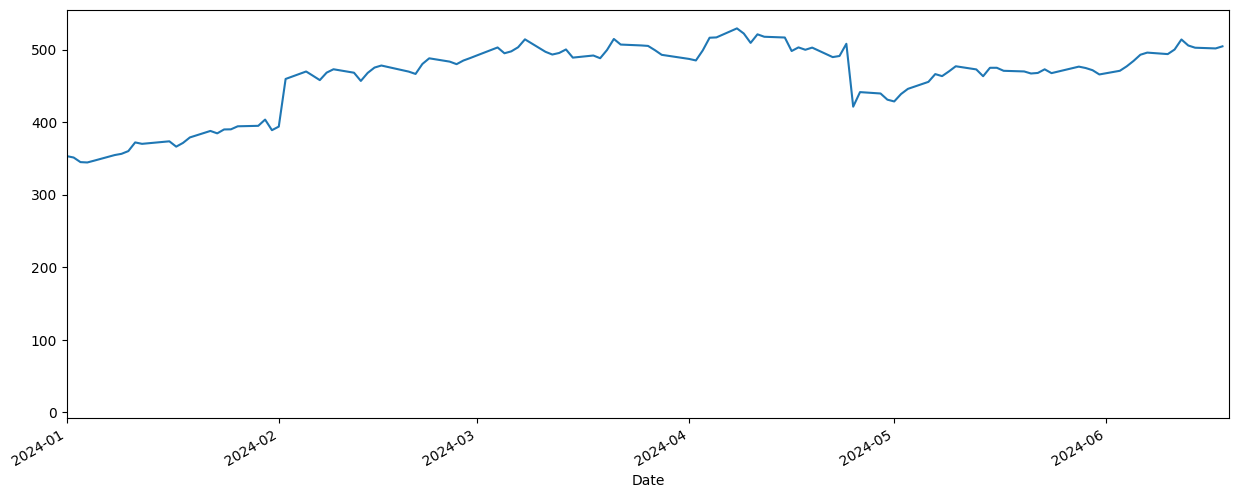

In [7]:
df_fb['Open'].plot(xlim=['2024-01-01', '2024-06-19'],figsize=(15,6))

In [8]:
df_fb['Open : 10 days rolling'] = df_fb['Open'].rolling(window=10, min_periods=1).mean()

<Axes: xlabel='Date'>

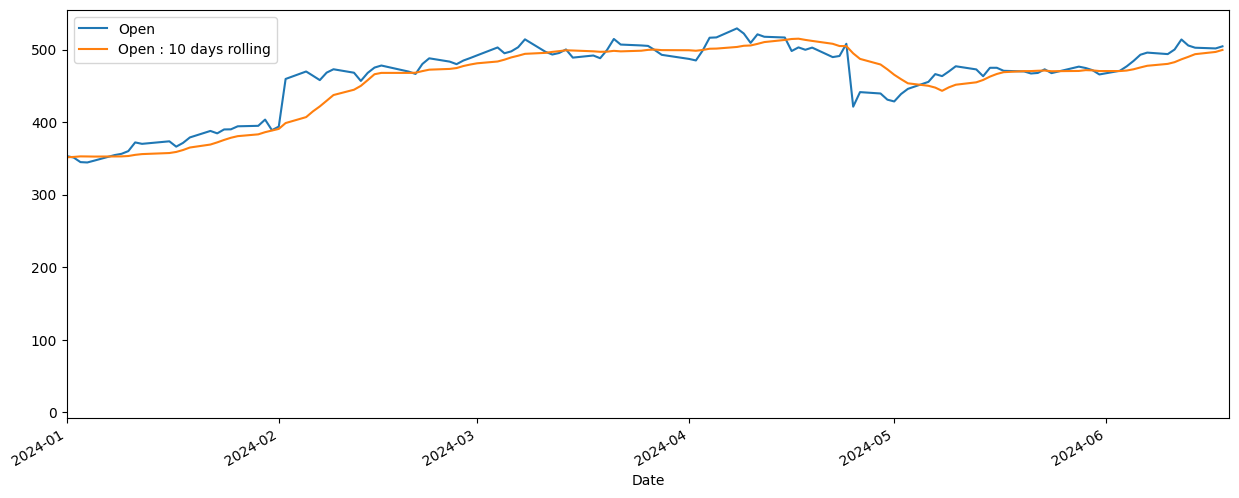

In [10]:
df_fb[['Open', 'Open : 10 days rolling']].plot(xlim=['2024-01-01', '2024-06-19'],figsize=(15,6))

In [15]:
df_fb['Open : 30 days rolling'] = df_fb['Open'].rolling(window=30, min_periods=1).mean()
df_fb['Open : 50 days rolling'] = df_fb['Open'].rolling(window=50, min_periods=1).mean()
df_fb['Open : 70 days rolling'] = df_fb['Open'].rolling(window=70, min_periods=1).mean()
df_fb['Open : 90 days rolling'] = df_fb['Open'].rolling(window=90, min_periods=1).mean()

<Axes: xlabel='Date'>

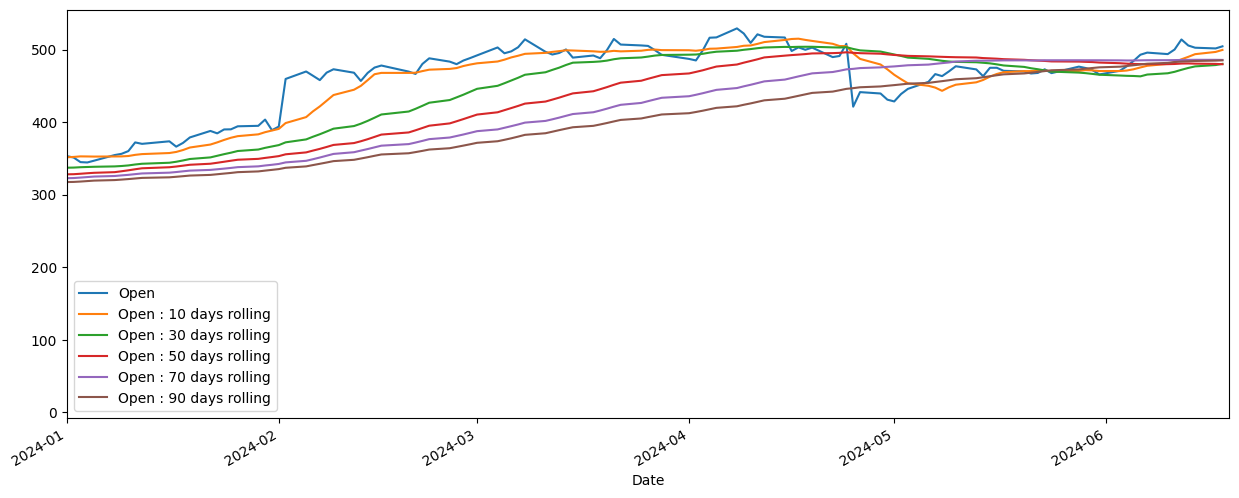

In [16]:
df_fb[['Open', 'Open : 10 days rolling', 'Open : 30 days rolling', 'Open : 50 days rolling', 'Open : 70 days rolling', 'Open : 90 days rolling']].plot(xlim=['2024-01-01', '2024-06-19'],figsize=(15,6))

# Cummulative Moving Average

<Axes: xlabel='Date'>

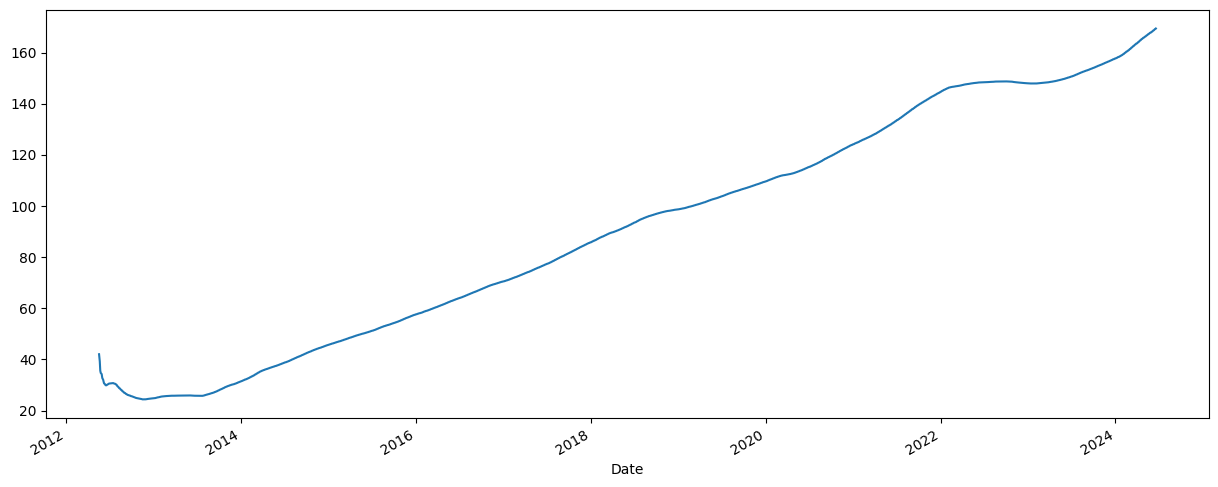

In [18]:
# Expanding
df_fb['Open'].expanding().mean().plot(figsize=(15,6))

# Exponential Moving Average

In [22]:
# EMA META shares
## Smoothening factor - 0.1
### Removing lags
df_fb['EMA_0.1'] = df_fb['Open'].ewm(alpha=0.1, adjust=False).mean()

<Axes: xlabel='Date'>

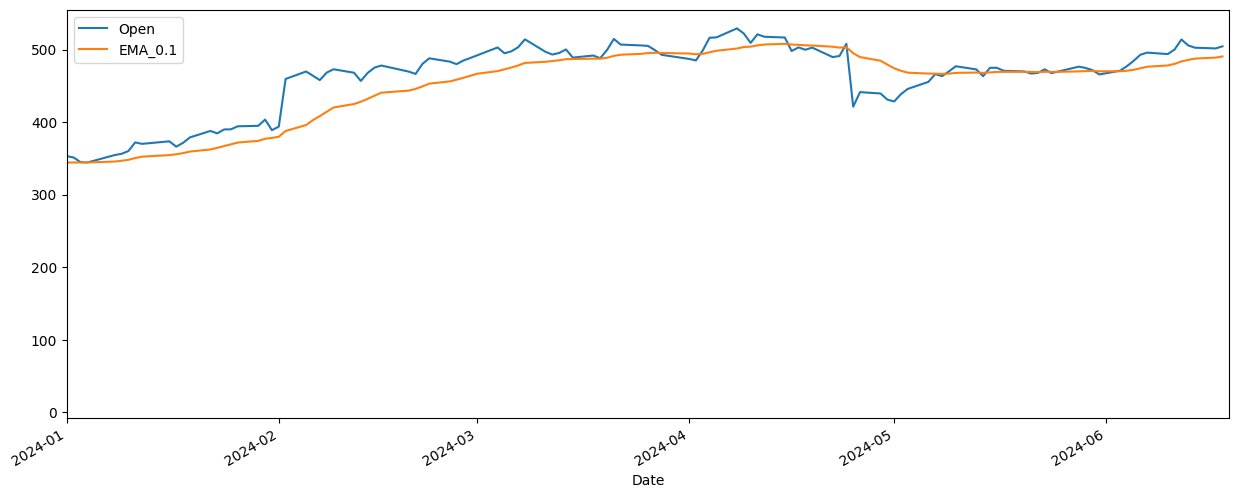

In [23]:
df_fb[['Open', 'EMA_0.1']].plot(xlim=['2024-01-01', '2024-06-19'],figsize=(15,6))

In [25]:
df_fb['EMA_0.5'] = df_fb['Open'].ewm(alpha=0.5, adjust=False).mean()

<Axes: xlabel='Date'>

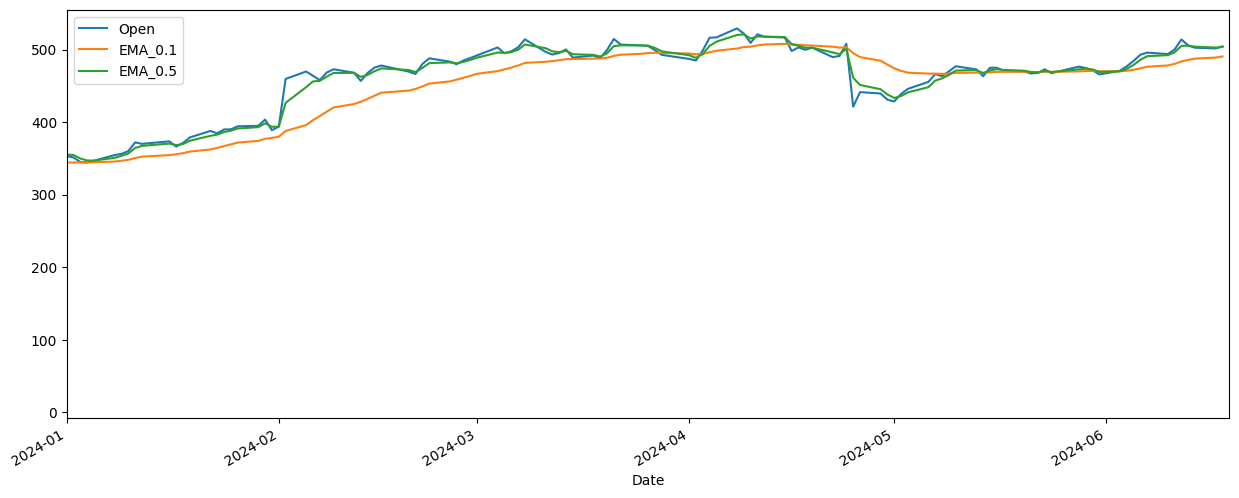

In [26]:
df_fb[['Open', 'EMA_0.1', 'EMA_0.5']].plot(xlim=['2024-01-01', '2024-06-19'],figsize=(15,6))